In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("used_cars_data.csv")
print(data.tail())

      S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats New_Price  Price  
7248  1598 

In [2]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [5]:
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [6]:
from datetime import date
date.today().year
data['AGE']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,AGE
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


In [7]:
data['Manufacturer'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Manufacturer','Model']]

,Name,Manufacturer,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [8]:
data.describe()


,Year,Kilometers_Driven,Seats,Price,AGE
count,7253.000000,7.253000e+03,7200.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468,11.634634
std,3.254421,8.442772e+04,0.811660,11.187917,3.254421
min,1996.000000,1.710000e+02,0.000000,0.440000,6.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,9.000000
50%,2014.000000,5.341600e+04,5.000000,5.640000,11.000000
75%,2016.000000,7.300000e+04,5.000000,9.950000,14.000000
max,2019.000000,6.500000e+06,10.000000,160.000000,29.000000


In [9]:
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,AGE,Manufacturer,Model
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000,7253.000000,7253,7252
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN,NaN,33,726
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN,NaN,Maruti,SwiftDzire
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN,NaN,1444,189
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468,11.634634,NaN,NaN
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917,3.254421,NaN,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000,6.000000,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000,9.000000,NaN,NaN
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000,11.000000,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000,14.000000,NaN,NaN


In [10]:
data['AVG_killometer']=data['Kilometers_Driven']/data['AGE']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,AGE,Manufacturer,Model,AVG_killometer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15,Maruti,WagonR,4800.000000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10,Hyundai,Creta1.6,4100.000000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14,Honda,JazzV,3285.714286
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13,Maruti,ErtigaVDI,6692.307692
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12,Audi,A4New,3389.166667


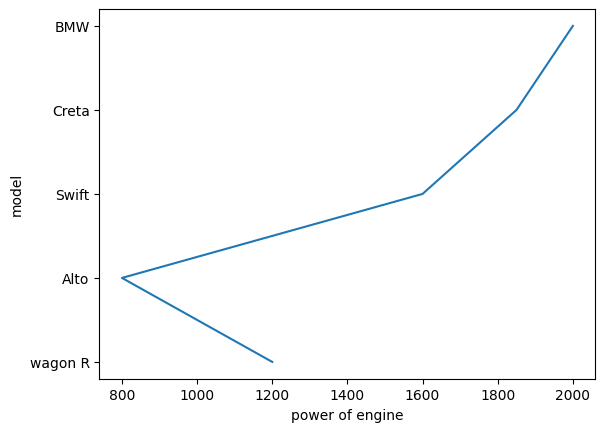

In [11]:
a=[1200,800,1600,1850,2000]
b=['wagon R','Alto','Swift','Creta','BMW']

plt.plot(a,b)
plt.xlabel('power of engine')
plt.ylabel('model')
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  AGE                7253 non-null   int64  
 14  Manufacturer       7253 non-null   object 
 15  Model              7252 non-null   object 
 16  AVG_killometer     7253 

In [13]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,AGE,Manufacturer,Model,AVG_killometer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15,Maruti,WagonR,4800.000000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10,Hyundai,Creta1.6,4100.000000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14,Honda,JazzV,3285.714286
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13,Maruti,ErtigaVDI,6692.307692
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12,Audi,A4New,3389.166667


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  AGE                7253 non-null   int64  
 14  Manufacturer       7253 non-null   object 
 15  Model              7252 non-null   object 
 16  AVG_killometer     7253 

In [15]:
data['Brand'] = data.Name.str.split().str.get(0)

In [16]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [17]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [18]:
print(data.Brand.unique())


['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [19]:
print(data.Brand.nunique())

33


In [20]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Manufacturer', 'Model',
       'Brand'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'AGE', 'AVG_killometer']


In [21]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(str).str.split().str.get(0)
data['Kilometers_Driven'] = data['Kilometers_Driven'].str.replace(',', '')  
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(float)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   float64
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  AGE                7253 non-null   int64  
 14  Manufacturer       7253 non-null   object 
 15  Model              7252 non-null   object 
 16  AVG_killometer     7253 

In [23]:
data['Mileage'] = data['Mileage'].astype(str).str.split().str.get(0)
data['Mileage'] = data['Mileage'].str.replace(',', '')  
data['Mileage'] = data['Mileage'].astype(float)

In [24]:
data['Engine'] = data['Engine'].astype(str).str.split().str.get(0)
data['Engine'] = data['Engine'].str.replace(',', '')  
data['Engine'] = data['Engine'].astype(float)

In [25]:
data['Power'] = data['Power'].astype(str).str.split().str.get(0)
data['Power'] = data['Power'].str.replace(',', '') 
data['Power'] = data['Power'].replace('null', np.nan)  
data['Power'] = data['Power'].astype(float)



In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000000,2014.000000,2016.000000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000000,53416.000000,73000.000000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170000,18.160000,21.100000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000000,1493.000000,1968.000000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000000,94.000000,138.100000,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000000,5.000000,5.000000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500000,5.640000,9.950000,160.00
AGE,7253.0,11.634634,3.254421,6.00,9.000000,11.000000,14.000000,29.00
AVG_killometer,7253.0,5026.618379,9917.577495,28.50,3181.818182,4583.333333,6068.888889,812500.00


Year
Skew : -0.84


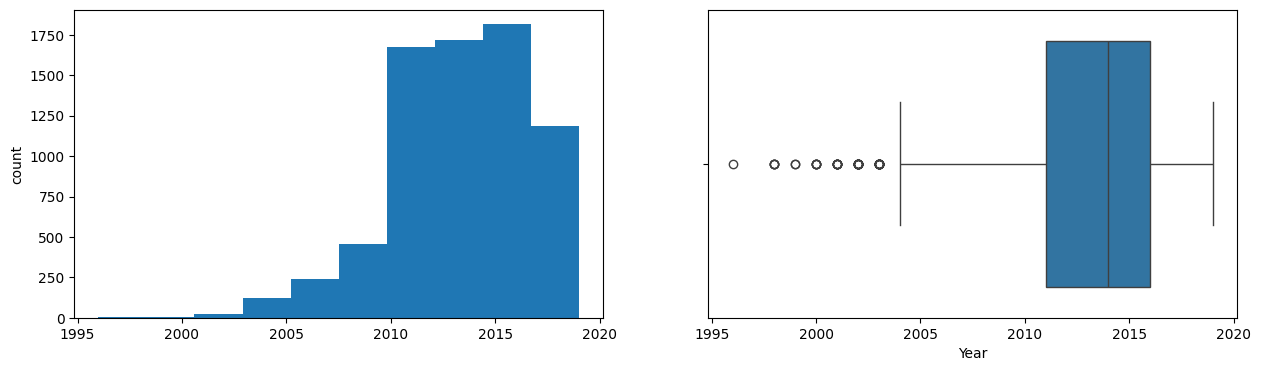

Kilometers_Driven
Skew : 61.58


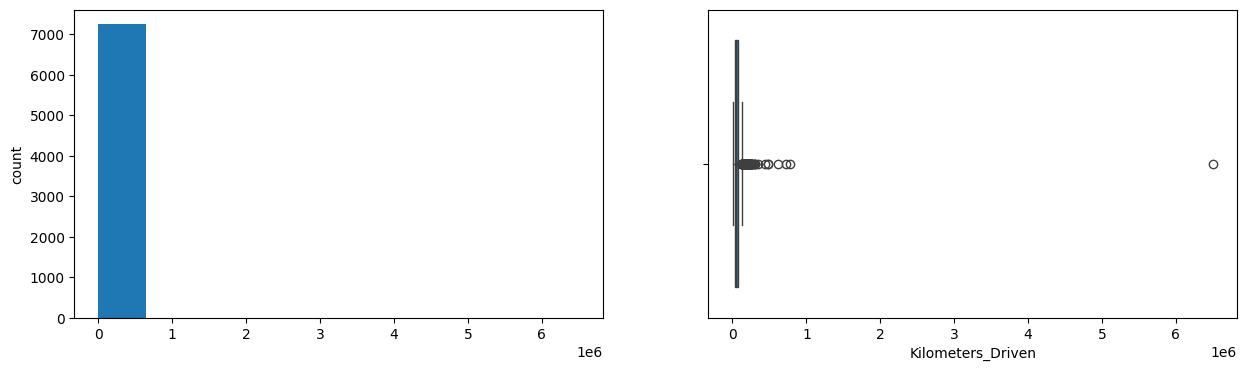

Seats
Skew : 1.9


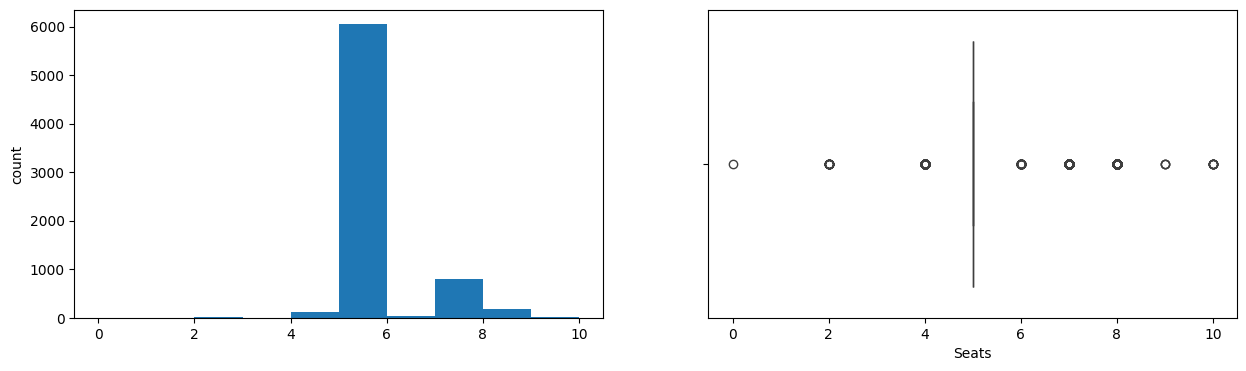

Price
Skew : 3.34


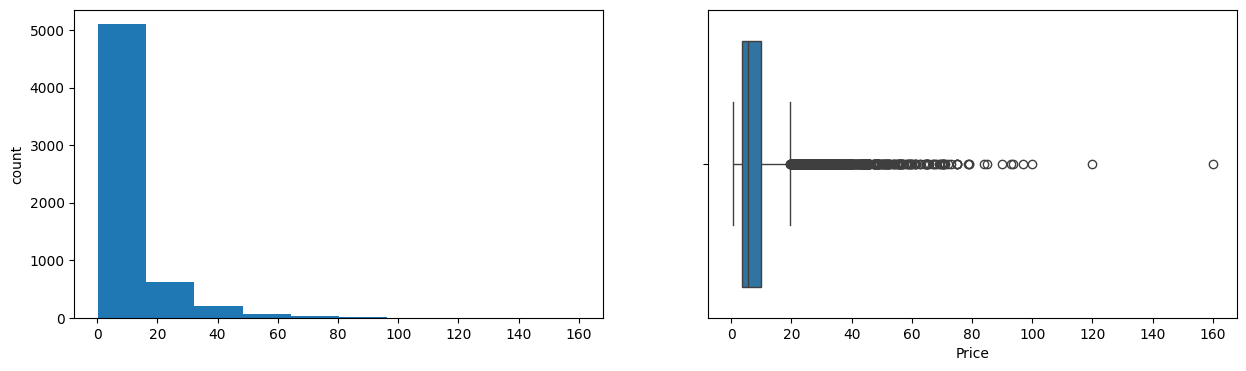

AGE
Skew : 0.84


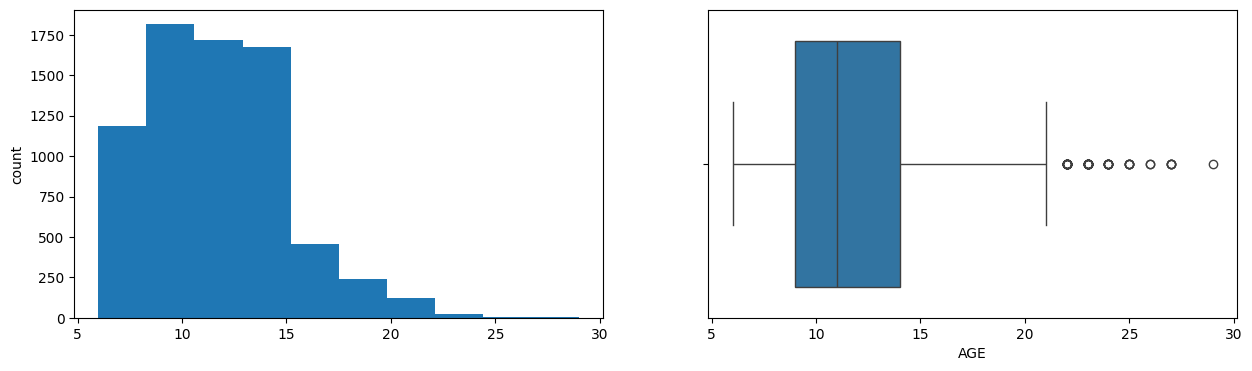

AVG_killometer
Skew : 74.56


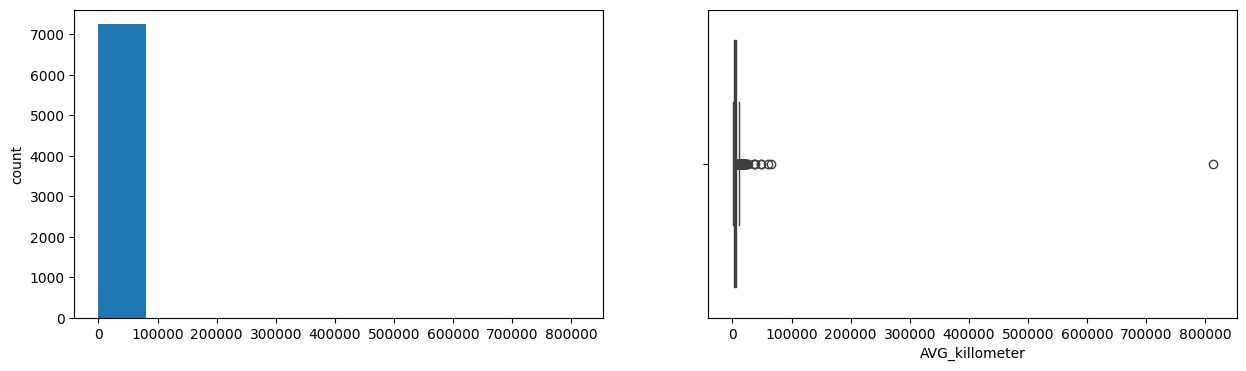

In [27]:
for col in num_cols:
    print(col)
    if pd.api.types.is_numeric_dtype(data[col]):
        print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

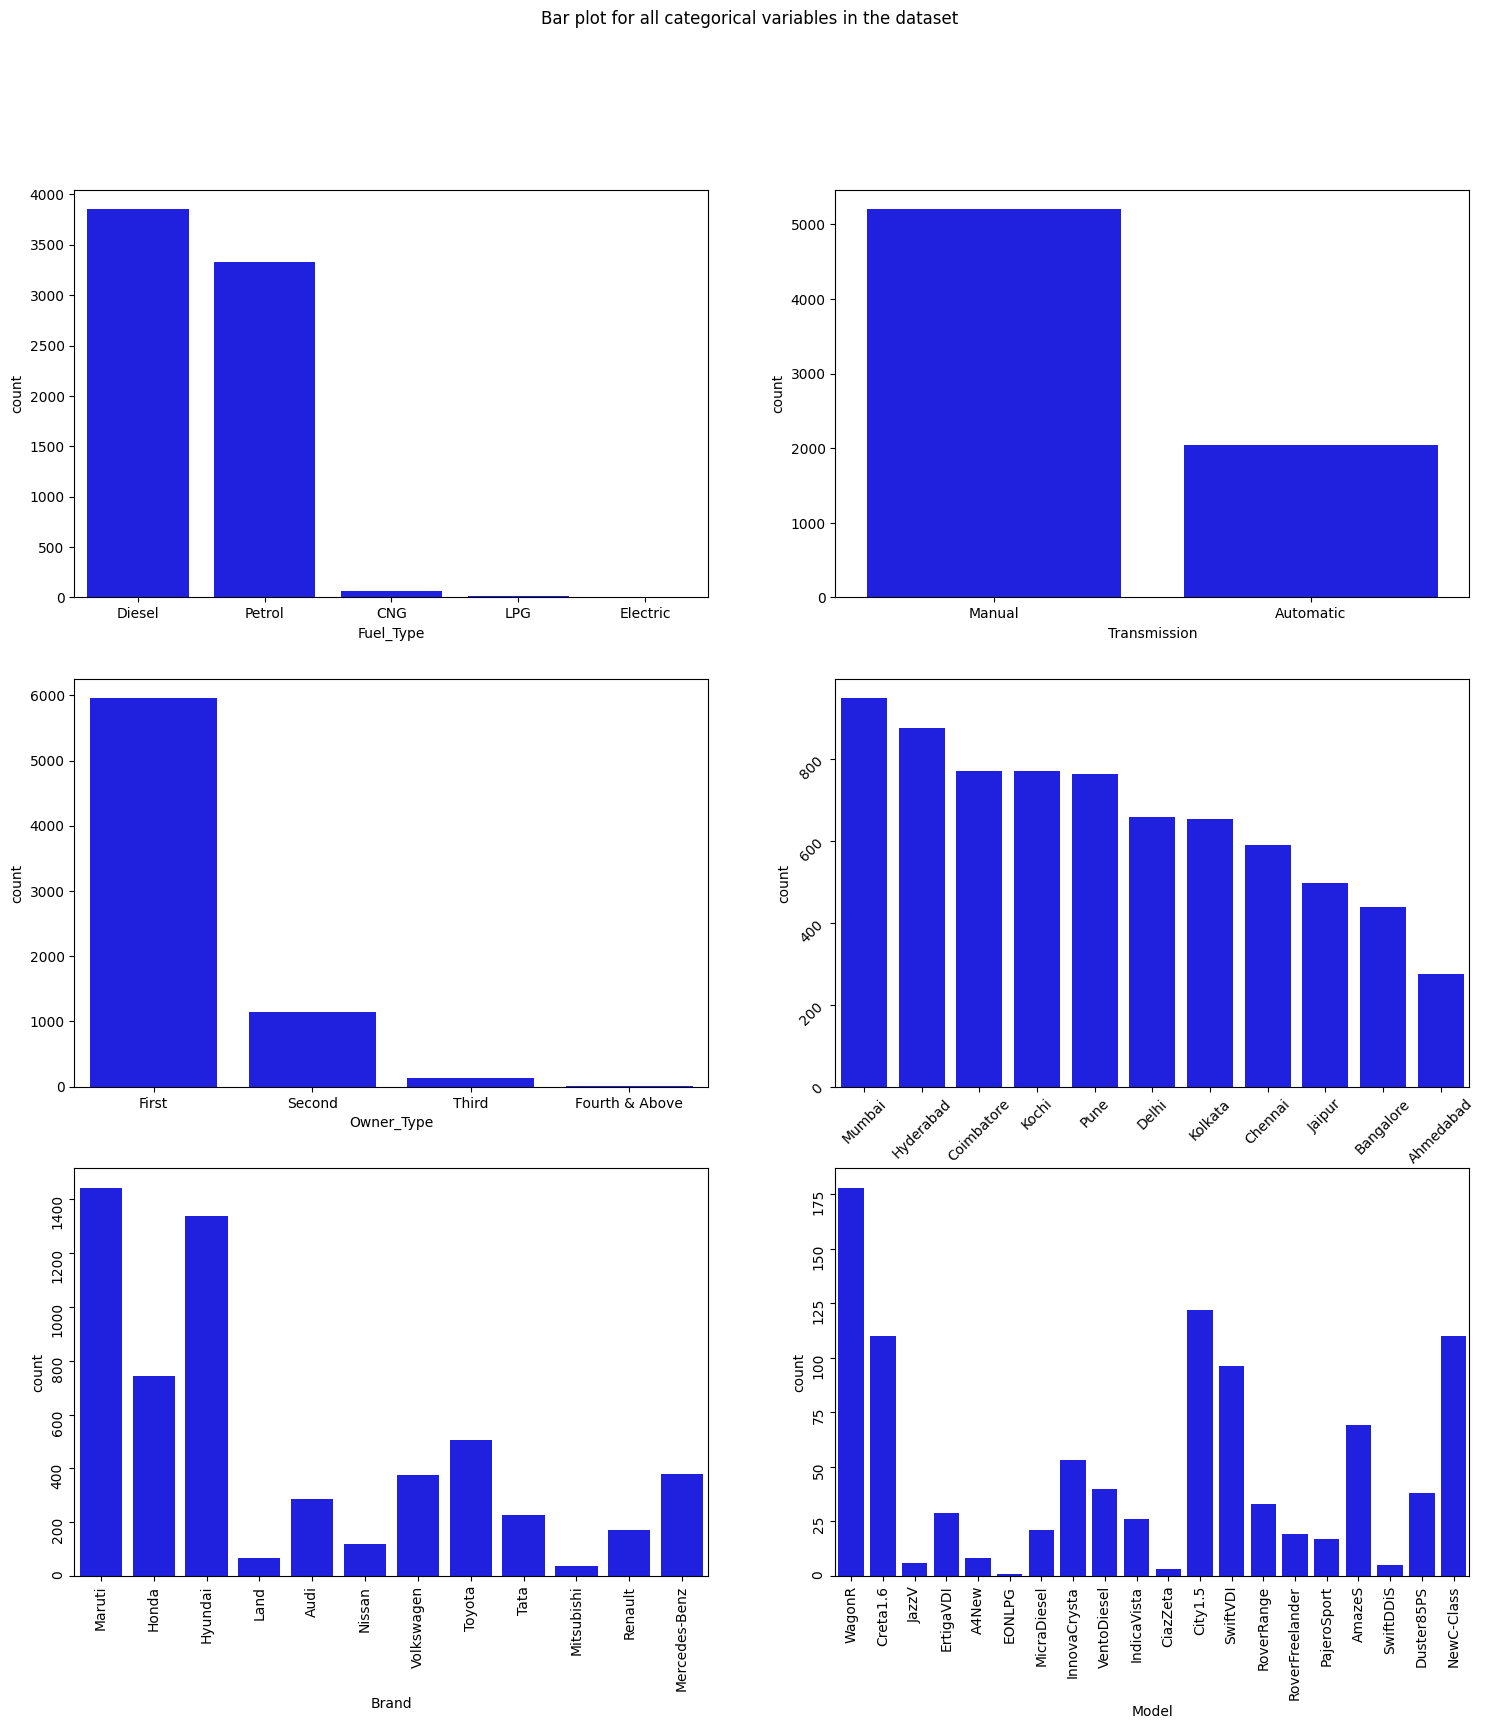

In [28]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [29]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [30]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   float64
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   float64
 8   Engine                 7207 non-null   float64
 9   Power                  7078 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  AGE                    7253 non-null   int64  
 14  Manufacturer           7253 non-null   object 
 15  Mode

C:\Users\Admin\AppData\Local\Temp\ipykernel_19380\718210832.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");


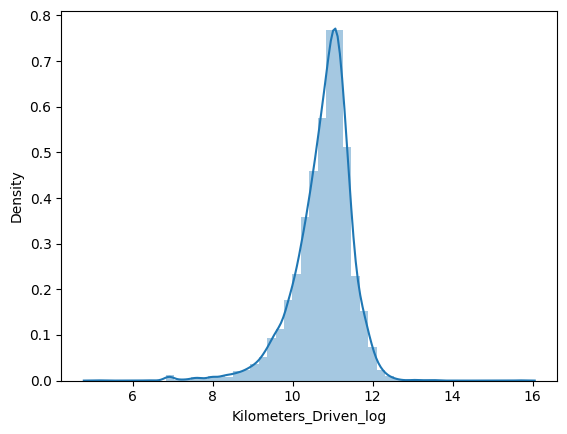

In [31]:
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");




C:\Users\Admin\AppData\Local\Temp\ipykernel_19380\130456864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Price_log"], axlabel="Price_log");


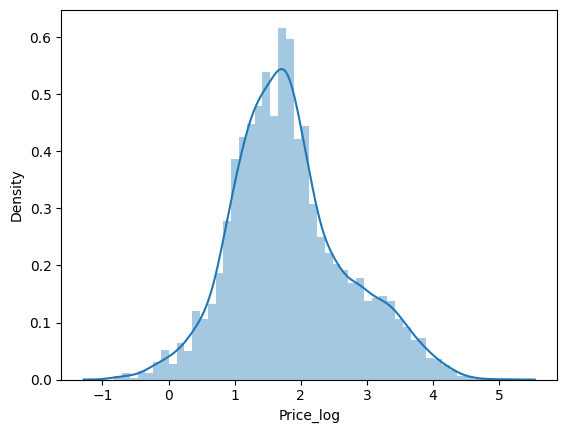

In [32]:
sns.distplot(data["Price_log"], axlabel="Price_log");

<Figure size 1300x1700 with 0 Axes>

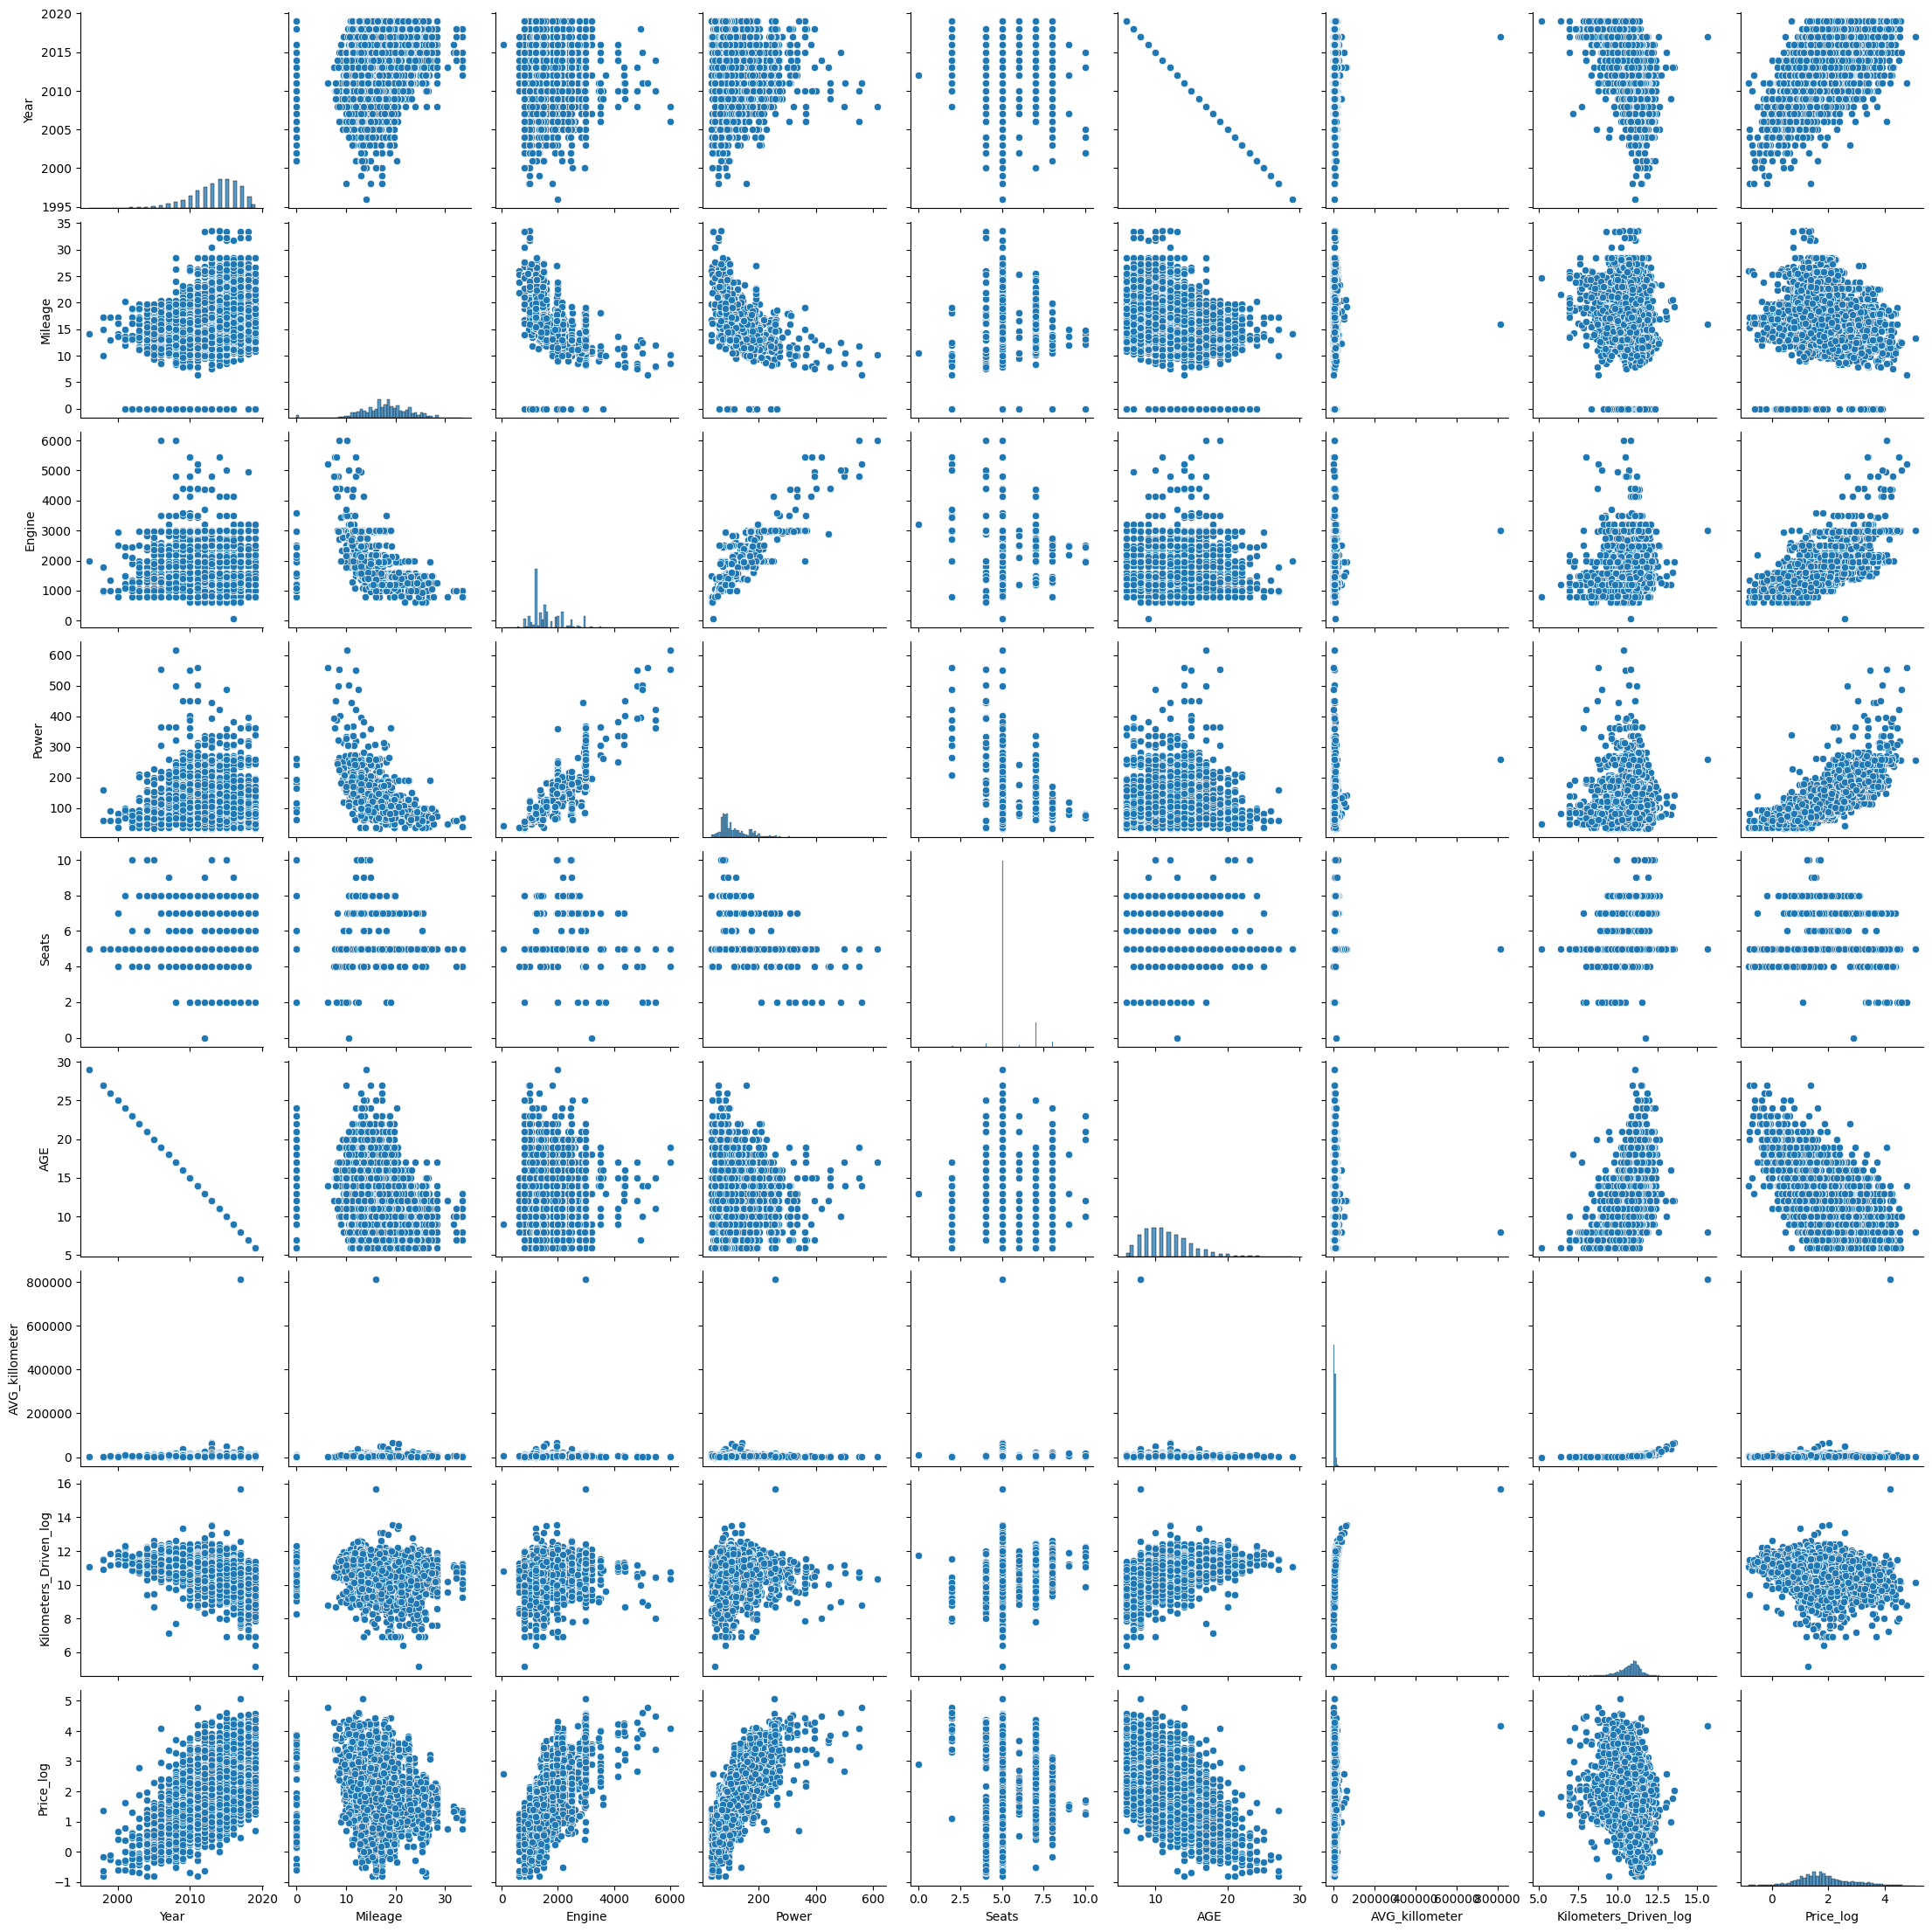

In [33]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

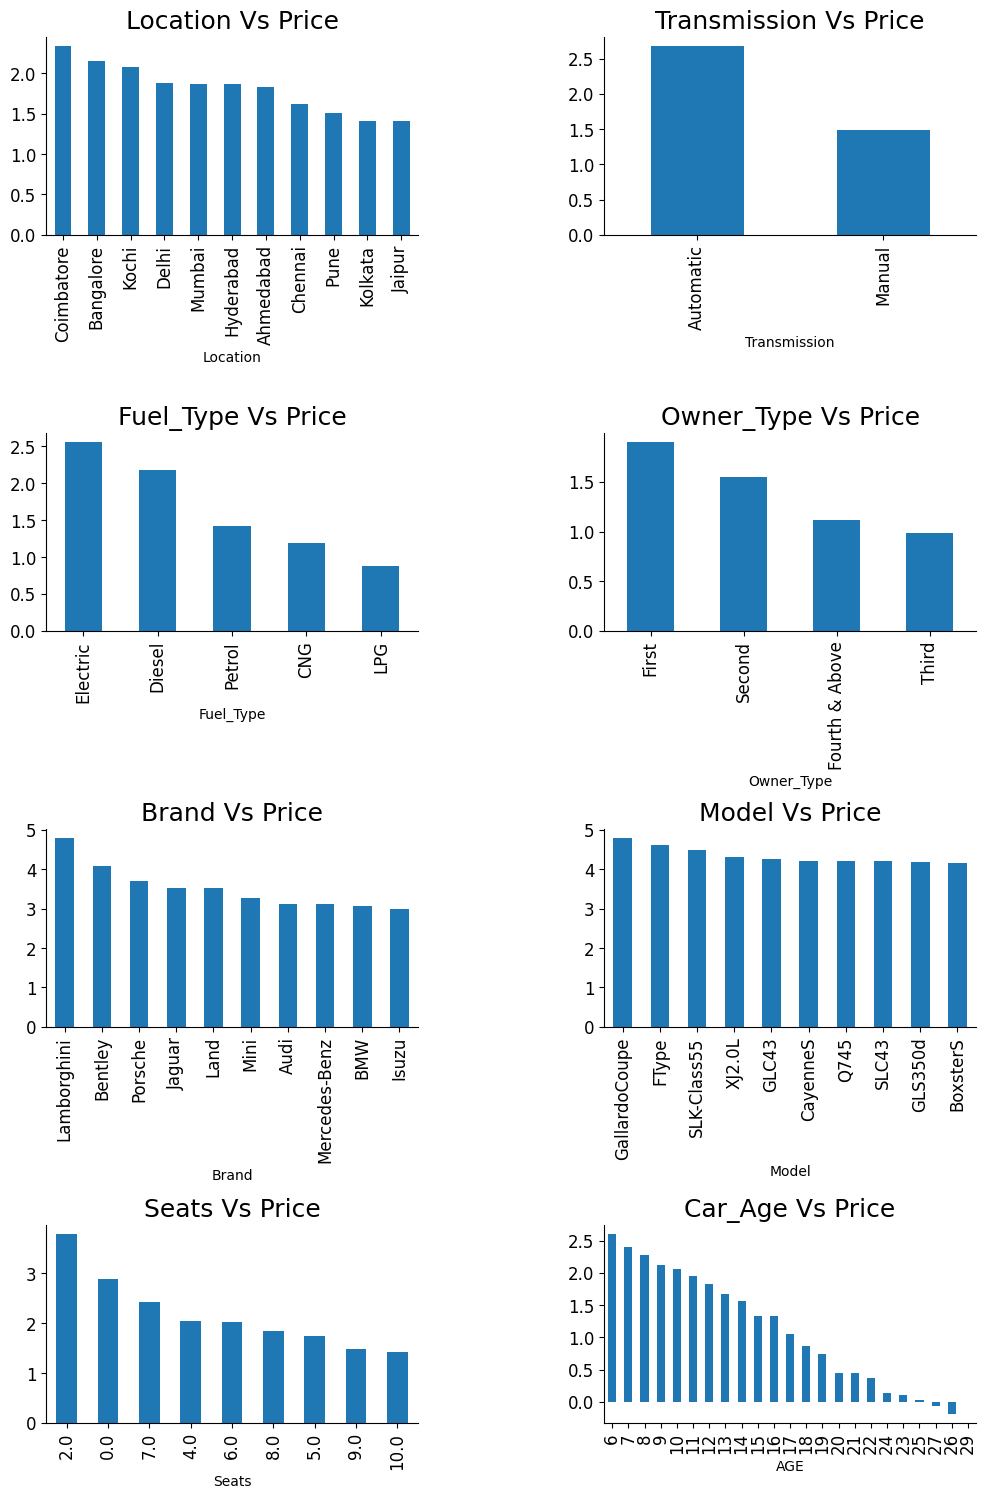

In [34]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('AGE')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

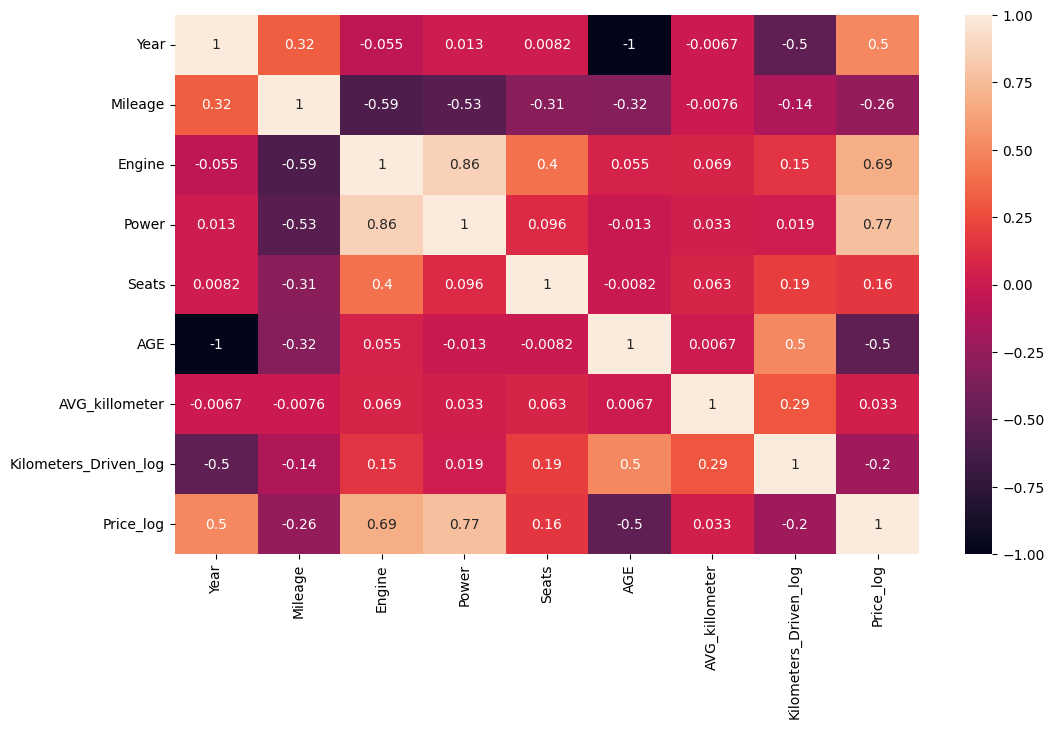

In [35]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(numeric_only=True), annot = True, vmin = -1, vmax = 1)
plt.show()

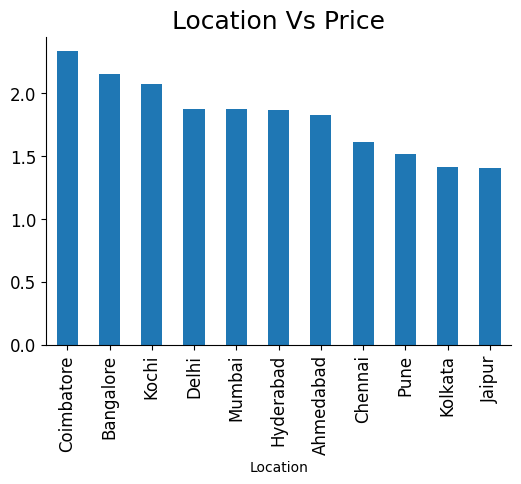

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))  
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=ax, fontsize=12)
ax.set_title("Location Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=0.5)
sns.despine()

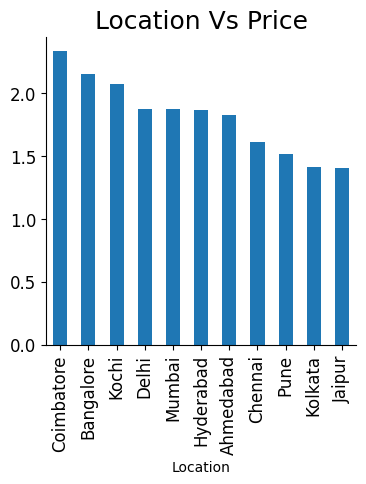

In [37]:
fig, ax = plt.subplots(figsize=(4, 4))  
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=ax, fontsize=12)
ax.set_title("Location Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=0.5)
sns.despine()

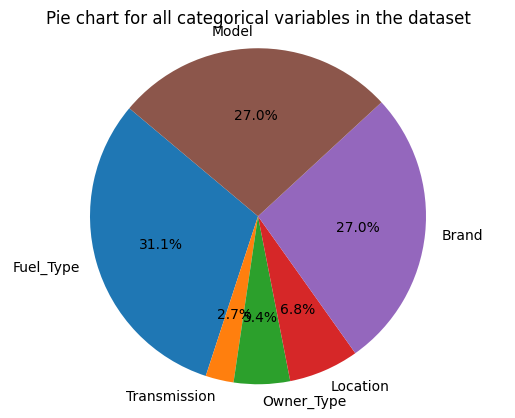

In [38]:
list1=['Fuel_Type', 'Transmission', 'Owner_Type', 'Location', 'Brand', 'Model']
values=[23, 2, 4, 5, 20, 20]
plt.pie(values, labels=list1, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Pie chart for all categorical variables in the dataset')
plt.show()